<a href="https://colab.research.google.com/github/santoshramakumar/Melanoma-detection-CNN-/blob/main/Assignment_CNN_Skin_Cancer(melanoma%20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

In [160]:
# use this to copy the zip file to your google drive from shared drive location  
# !gdown --id 1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs

### Importing all the important libraries

In [161]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D,Flatten , Dense,Dropout , experimental
from tensorflow.keras.models import Sequential
import cv2
from glob import glob
import shutil


In [162]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [163]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [164]:
### delete the output folder if it exists - this will help when rerunning the script again 

N = 0  # total files
previous_path = ""
for dirpath, dirnames, filenames in os.walk(data_dir_train):
#   N_c = len(filenames)
#   N += N_c
#   print ("Files in ", dirpath, N_c)
   if(dirpath == previous_path+"/"+"output" ):
     print("deleting output folder : " , dirpath)
     shutil.rmtree(dirpath)
   previous_path = dirpath
#print ("Total Files ",N)

deleting output folder :  /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output
deleting output folder :  /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output
deleting output folder :  /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output
deleting output folder :  /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output
deleting output folder :  /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output


In [165]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [166]:
N = 0  # total files
for dirpath, dirnames, filenames in os.walk(data_dir_train):
   N_c = len(filenames)
   N += N_c
#   n = n+1
   print ("Files in ", dirpath, N_c)
print ("Total Files ",N)

Files in  /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train 0
Files in  /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis 114
Files in  /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma 376
Files in  /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma 95
Files in  /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma 438
Files in  /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus 357
Files in  /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis 4

Class imbalance problem  - not all classes have the same set of images  - we shall address this later using augmentation


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [167]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [168]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size, seed=123, image_size=(img_height,img_width), validation_split = 0.2,
  subset = 'training')

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [169]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [170]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size, seed=123, image_size=(img_height,img_width), validation_split = 0.2,
  subset = 'validation')

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [171]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [172]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

#image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

#train_data_gen = image_generator.flow_from_directory(data_dir_train, 
#                                              target_size=(img_height, img_width), 
#                                              class_mode="categorical", 
#                                              shuffle=True, 
#                                              batch_size=batch_size)

In [173]:
image_batch, label_batch = next(iter(train_ds))

In [174]:
# check the shape of image_batch 
image_batch.shape

TensorShape([32, 180, 180, 3])

In [175]:
# check the shape of label_batch 
label_batch.shape

TensorShape([32])

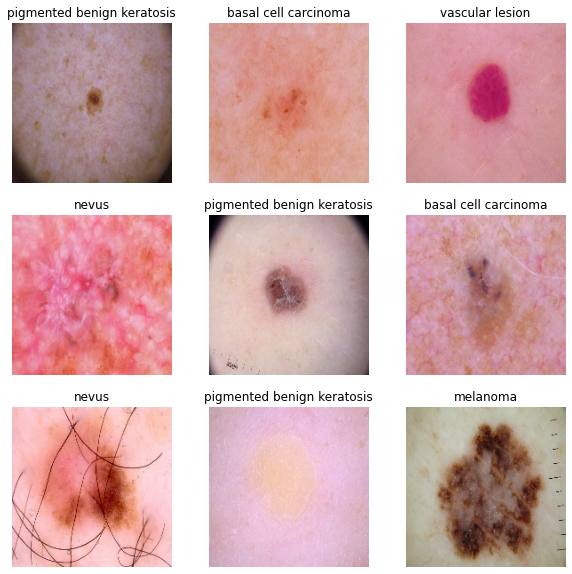

In [176]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [177]:
### Your code goes here


In [178]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [179]:
print(train_ds)
print(val_ds)

<PrefetchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>
<PrefetchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>


### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [180]:
model = Sequential()
model.add(experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(16, (3, 3), padding='same',input_shape=(img_height,img_width,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(len(class_names)))
model.add(Activation('softmax')) 



### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [181]:
### Todo, choose an appropirate optimiser and loss function
#model.compile(optimizer='sgd',
#              loss='categorical_crossentropy',
#              metrics=['accuracy'])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [182]:
# View the summary of all layers
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_9 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
activation_57 (Activation)   (None, 180, 180, 16)      0         
_________________________________________________________________
batch_normalization_35 (Batc (None, 180, 180, 16)      64        
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
activation_58 (Activation)   (None, 90, 90, 32)      

### Train the model

In [183]:
epochs = 20
history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


56/56 [==============================] - 12s 59ms/step - loss: 7.7053 - accuracy: 0.3253 - val_loss: 33.0062 - val_accuracy: 0.0492
Epoch 2/20
56/56 [==============================] - 1s 19ms/step - loss: 1.5043 - accuracy: 0.4872 - val_loss: 48.5335 - val_accuracy: 0.0515
Epoch 3/20
56/56 [==============================] - 1s 19ms/step - loss: 1.3170 - accuracy: 0.5212 - val_loss: 47.1341 - val_accuracy: 0.0492
Epoch 4/20
56/56 [==============================] - 1s 19ms/step - loss: 1.1550 - accuracy: 0.5926 - val_loss: 42.6365 - val_accuracy: 0.0582
Epoch 5/20
56/56 [==============================] - 1s 19ms/step - loss: 1.0390 - accuracy: 0.6323 - val_loss: 34.8745 - val_accuracy: 0.0761
Epoch 6/20
56/56 [==============================] - 1s 19ms/step - loss: 0.8692 - accuracy: 0.6775 - val_loss: 22.8667 - val_accuracy: 0.0984
Epoch 7/20
56/56 [==============================] - 1s 19ms/step - loss: 0.7834 - accuracy: 0.7126 - val_loss: 10.4820 - val_accuracy: 0.1767
Epoch 8/20
56/56

### Visualizing training results

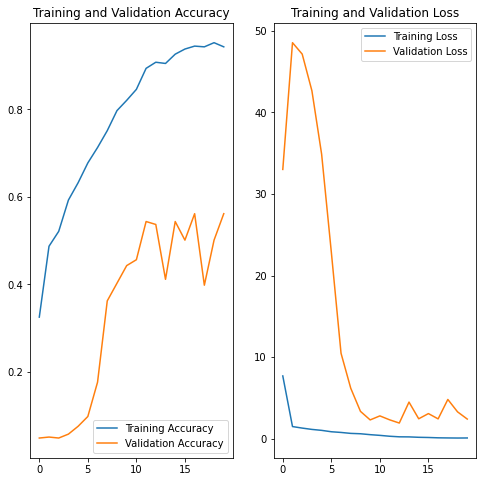

In [184]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

# As you can see from the plots, training accuracy and validation accuracy are off by large margin and the model has achieved around 88% accuracy on the training set.

# training accuracy is increasing linearly over time, whereas validation accuracy stalls around 55% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable —a sign of overfitting.


### Write your findings here

To over come the over fitting we shall use data augmentation and add dropouts to the model 


In [185]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)


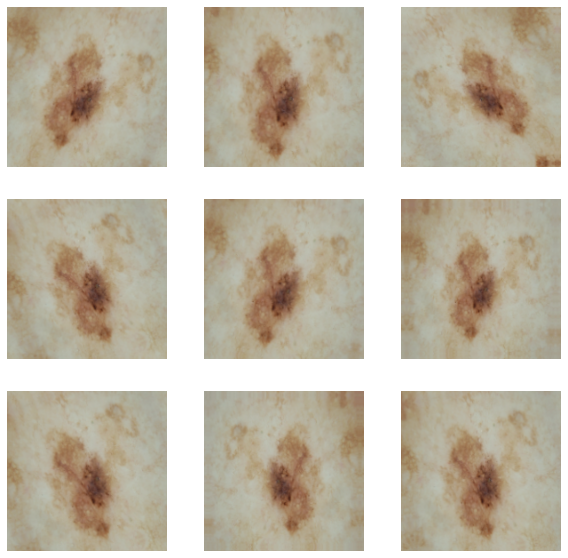

In [186]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [187]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential()
model.add(data_augmentation)
model.add(experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(16, (3, 3), padding='same',input_shape=(img_height,img_width,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(class_names)))
model.add(Activation('softmax')) 



### Compiling the model

In [188]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [189]:
## Your code goes here, note: train your model for 20 epochs
#history = ## your training code

epochs = 50
history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)



Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


56/56 [==============================] - 3s 27ms/step - loss: 11.8384 - accuracy: 0.2812 - val_loss: 13.6232 - val_accuracy: 0.2058
Epoch 2/50
56/56 [==============================] - 1s 24ms/step - loss: 2.0345 - accuracy: 0.3175 - val_loss: 21.7226 - val_accuracy: 0.2058
Epoch 3/50
56/56 [==============================] - 1s 24ms/step - loss: 1.8946 - accuracy: 0.3393 - val_loss: 21.6538 - val_accuracy: 0.2058
Epoch 4/50
56/56 [==============================] - 1s 23ms/step - loss: 1.8622 - accuracy: 0.3198 - val_loss: 20.2852 - val_accuracy: 0.2058
Epoch 5/50
56/56 [==============================] - 1s 23ms/step - loss: 1.7803 - accuracy: 0.3488 - val_loss: 16.2951 - val_accuracy: 0.2058
Epoch 6/50
56/56 [==============================] - 1s 23ms/step - loss: 1.7730 - accuracy: 0.3633 - val_loss: 18.8386 - val_accuracy: 0.2282
Epoch 7/50
56/56 [==============================] - 1s 23ms/step - loss: 1.7283 - accuracy: 0.3588 - val_loss: 11.5456 - val_accuracy: 0.2528
Epoch 8/50
56/56

In [190]:
model.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_14 (Sequential)   (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_10 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
activation_62 (Activation)   (None, 180, 180, 16)      0         
_________________________________________________________________
batch_normalization_38 (Batc (None, 180, 180, 16)      64        
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 90, 90, 16)      

### Visualizing the results

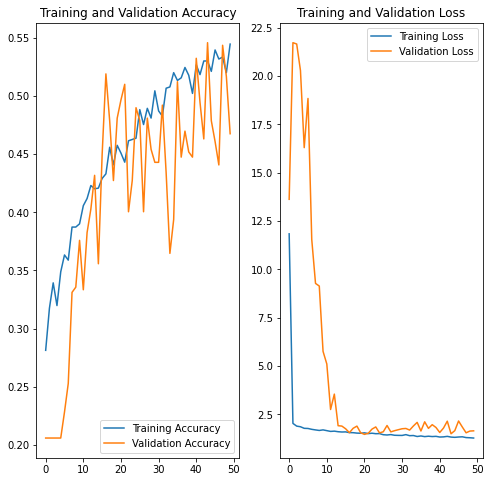

In [191]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

# The margin between training and validation has reduced -  but the model accuracy on training and validation has gone down considerably 

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [192]:
## Your code goes here.
totalimages = []

N = 0  # total files
for dirpath, dirnames, filenames in os.walk(data_dir_train):
   #filecount = len(filenames) 
   if(len(filenames) > 0):
     totalimages.append(len(filenames))
   N_c = len(filenames)
   N += N_c
   print ("Files in ", dirpath, N_c)
print ("Total Files ",N)
image_ds = pd.DataFrame({"name":class_names, "totalimages":totalimages})


Files in  /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train 0
Files in  /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis 114
Files in  /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma 376
Files in  /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma 95
Files in  /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma 438
Files in  /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus 357
Files in  /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis 4

<BarContainer object of 9 artists>

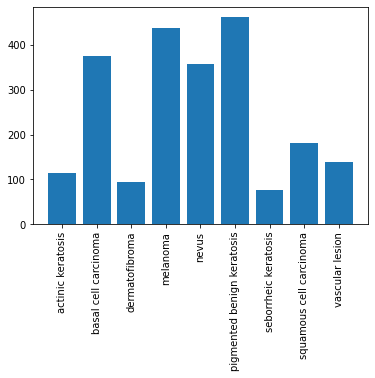

In [193]:
plt.xticks(rotation='vertical')
#plt.set_xticklabels(image_ds.totalimages)
plt.bar(image_ds.name, image_ds.totalimages )


In [194]:
image_ds

,name,totalimages
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


#### **Todo:** Write your findings here: 
# - Which class has the least number of samples?  
# Ans : Class " seborrheic keratosis"  has least number of samples = 77 

# - Which classes dominate the data in terms proportionate number of samples?
# Ans : Classes like "pigmented benign keratosis", "melanoma", "basal cell carcinoma" and "nevus" dominate the data with max samples  


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [195]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [196]:
path_to_training_dataset= data_dir_train #"To do"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset / i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7AD0D22310>: 100%|██████████| 500/500 [00:10<00:00, 46.12 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F7BC3F7F390>: 100%|██████████| 500/500 [00:10<00:00, 48.29 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7AD15026D0>: 100%|██████████| 500/500 [00:11<00:00, 45.12 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F7A4027B490>: 100%|██████████| 500/500 [00:52<00:00,  9.60 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=576x768 at 0x7F7AD15423D0>: 100%|██████████| 500/500 [00:54<00:00,  9.18 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F7A413DB050>: 100%|██████████| 500/500 [00:10<00:00, 45.62 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F7A407A51D0>: 100%|██████████| 500/500 [00:24<00:00, 20.44 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7A406B09D0>: 100%|██████████| 500/500 [00:11<00:00, 44.70 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F7A406B1110>: 100%|██████████| 500/500 [00:10<00:00, 46.47 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [197]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [198]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029025.jpg_32008864-901c-4943-8a72-642b66585fc0.jpg',
 '/content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031922.jpg_ea3806e7-e80d-43ab-9cdb-dd7c79094ef4.jpg',
 '/content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030730.jpg_18ee7bc7-0649-4426-b6bd-8a58a6c2c970.jpg',
 '/content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033705.jpg_b4d45ce8-1ff8-4276-81a9-aaaa6f301749.jpg',
 '/content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The Internati

In [199]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [200]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [201]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [202]:
path_list_new[1]

'/content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031922.jpg_ea3806e7-e80d-43ab-9cdb-dd7c79094ef4.jpg'

In [203]:
new_df['Label'].value_counts()

nevus                         500
seborrheic keratosis          500
squamous cell carcinoma       500
basal cell carcinoma          500
actinic keratosis             500
pigmented benign keratosis    500
vascular lesion               500
dermatofibroma                500
melanoma                      500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [204]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [205]:
data_dir_train

PosixPath('/content/gdrive/MyDrive/ML data /CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [206]:
data_dir_train =  data_dir_train # "path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",  ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [207]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [208]:
## your code goes here

model = Sequential()
model.add(experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(16, (3, 3), padding='same',input_shape=(img_height,img_width,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# adding one more layer 
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# adding one more layer 
model.add(Conv2D(64, (3, 3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(class_names)))
model.add(Activation('softmax')) 

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [209]:
## your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [210]:
#epochs = 30
## Your code goes here, use 50 epochs.
#history = # your model fit code

epochs = 50
history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


169/169 [==============================] - 25s 137ms/step - loss: 1.7831 - accuracy: 0.3744 - val_loss: 4.2349 - val_accuracy: 0.1737
Epoch 2/50
169/169 [==============================] - 24s 137ms/step - loss: 1.3414 - accuracy: 0.5048 - val_loss: 4.4621 - val_accuracy: 0.1492
Epoch 3/50
169/169 [==============================] - 24s 137ms/step - loss: 1.1242 - accuracy: 0.5792 - val_loss: 2.1518 - val_accuracy: 0.3630
Epoch 4/50
169/169 [==============================] - 24s 136ms/step - loss: 0.9649 - accuracy: 0.6280 - val_loss: 1.4310 - val_accuracy: 0.5330
Epoch 5/50
169/169 [==============================] - 24s 137ms/step - loss: 0.8068 - accuracy: 0.7046 - val_loss: 1.2915 - val_accuracy: 0.6028
Epoch 6/50
169/169 [==============================] - 24s 137ms/step - loss: 0.6969 - accuracy: 0.7368 - val_loss: 1.4849 - val_accuracy: 0.5620
Epoch 7/50
169/169 [==============================] - 24s 137ms/step - loss: 0.5720 - accuracy: 0.7825 - val_loss: 1.0408 - val_accuracy: 0.6

#### **Todo:**  Visualize the model results

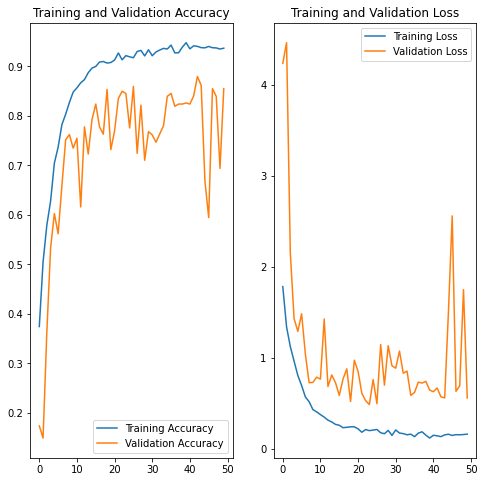

In [211]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



# The final model is still not perfect but is able to resolve the overfitting to a considerable extent with Test accuracy: 93.69% and Validation accuracy of : 85.52%

# rebalance or Augmentation helped improve the model accuracy on validation from initial validation accuracy of 49% to final validation accuracy score of 85.52%